### Author: Xin Sui 
### Created Date: Nov 7, 2019
### Description: This file contains the Exploratory Data Analysis and a model to predict the active users in the 2019-10 to 2019-12. 

# 1. Read Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("XSUI_20191104-155630.csv")

In [3]:
df.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651
1,z3On32OJkp,230.0,5.0,NaN,NaN,NaN,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653
3,fUFDxaLxl5,185.0,10.0,NaN,NaN,NaN,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652
4,cLXsHcJvH6,50.0,8.0,NaN,NaN,NaN,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652


In [4]:
df.dtypes

singleSetId            object
weight                float64
reps                  float64
distance              float64
duration              float64
elevationGain         float64
setNumber               int64
exerciseSetParseId     object
exerciseName           object
workoutId              object
workoutDate            object
fake_user_id           object
dtype: object

In [5]:
df.describe()

,weight,reps,distance,duration,elevationGain,setNumber
count,36494.000000,36494.000000,34033.00000,34033.000000,34033.000000,36496.000000
mean,26.537014,10.139201,55.64752,18.748623,0.027397,2.322364
std,39.722608,5.449421,1510.86343,207.850120,0.896621,1.232460
min,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,2.267965,8.000000,0.00000,0.000000,0.000000,1.000000
50%,13.607787,10.000000,0.00000,0.000000,0.000000,2.000000
75%,31.751504,12.000000,0.00000,0.000000,0.000000,3.000000
max,530.703704,133.000000,259104.38400,9560.363611,60.900002,12.000000


# 2. Clean Data

## 2.1 Get a sense of missing values in the dataset

In [6]:
# copy the new data and make changes on the copied data
data = df.copy()

In [7]:
# Get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

singleSetId              0
weight                   2
reps                     2
distance              2463
duration              2463
elevationGain         2463
setNumber                0
exerciseSetParseId       0
exerciseName            24
workoutId                0
workoutDate              0
fake_user_id             0
dtype: int64

In [8]:
# Check many total missing values
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of missing data
(total_missing/total_cells) * 100

1.6935645915534123

In [9]:
# Group data to read more clearly
df1 = data.groupby(['fake_user_id','workoutId','workoutDate','exerciseSetParseId'])

In [10]:
# Sort by setNumber's value
df2 = df1.apply(lambda x: x.sort_values(["setNumber"], ascending = True))
df2.head()

singleSetId  \
fake_user_id workoutId  workoutDate exerciseSetParseId                     
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240  eaNfSNl8jK   
                                                       20809  Lo8QkGEDaM   
                                                       7712   Y3MvmGdtY7   
                                                       3888   NPGt3HwIXZ   
                                    BsHfdchEvY         22815  g6jBGtMU8D   

                                                                 weight  reps  \
fake_user_id workoutId  workoutDate exerciseSetParseId                          
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240  61.235043  10.0   
                                                       20809  81.646724   5.0   
                                                       7712   81.646724   5.0   
                                                       3888   81.646724   5.0   
                                    BsHfdchEvY         22815  15.875752  10.0   

                                                              distance  \
fake_user_id workoutId  workoutDate exerciseSetParseId                   
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240       0.0   
                                                       20809       0.0   
                                                       7712        0.0   
                                                       3888        0.0   
                                    BsHfdchEvY         22815       0.0   

                                                              duration  \
fake_user_id workoutId  workoutDate exerciseSetParseId                   
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240       0.0   
                                                       20809       0.0   
                                                       7712        0.0   
                                                       3888        0.0   
                                    BsHfdchEvY         22815       0.0   

                                                              elevationGain  \
fake_user_id workoutId  workoutDate exerciseSetParseId                        
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240            0.0   
                                                       20809            0.0   
                                                       7712             0.0   
                                                       3888             0.0   
                                    BsHfdchEvY         22815            0.0   

                                                              setNumber  \
fake_user_id workoutId  workoutDate exerciseSetParseId                    
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240          1   
                                                       20809          2   
                                                       7712           3   
                                                       3888           4   
                                    BsHfdchEvY         22815          1   

                                                             exerciseSetParseId  \
fake_user_id workoutId  workoutDate exerciseSetParseId                            
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240         7DgyMuvVnF   
                                                       20809         7DgyMuvVnF   
                                                       7712          7DgyMuvVnF   
                                                       3888          7DgyMuvVnF   
                                    BsHfdchEvY         22815         BsHfdchEvY   

                                                                             exerciseName  \
fake_user_id workoutId  workoutDate exerciseSetParseId                                      
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF         36240  Barbell Decl

## 2.2 Check NaN values to see if we can fill those values

### 2.2.2 [weight] & [reps]
We check them together, because they have the same number of missing values

In [11]:
# Weight Column
weight_null = data[data['weight'].isnull()]
weight_null

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
32786,dbJU1QUT27,NaN,NaN,NaN,NaN,NaN,1,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
34893,r6Sy0yoidE,NaN,NaN,NaN,NaN,NaN,3,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661


In [12]:
# Reps Column
reps_null = data[data['reps'].isnull()]
reps_null

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
32786,dbJU1QUT27,NaN,NaN,NaN,NaN,NaN,1,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
34893,r6Sy0yoidE,NaN,NaN,NaN,NaN,NaN,3,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661


In [13]:
# Check each missing value by group
val8 = df1.get_group(('fake_id_651','6pfQFK86uJ','2019-06-08','BcHNYcmBiL'))
val8 = val8.sort_values('setNumber',ascending = False)
val8

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
34156,4rb5ieTPbz,111.130263,4.0,0.0,0.0,0.0,4,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
29665,JBq0ZOXzqQ,102.058405,8.0,0.0,0.0,0.0,3,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
19710,PondfSvQFQ,92.986546,3.0,0.0,0.0,0.0,2,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
32786,dbJU1QUT27,NaN,NaN,NaN,NaN,NaN,1,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651


In [14]:
data.iloc[32786,df.columns.get_loc('weight')] 

nan

In [15]:
data.iloc[32786,df.columns.get_loc('reps')] 

nan

In [16]:
val8.iloc[3, df.columns.get_loc('weight')] 

nan

In [17]:
# Interpolate the cells
val8['reps'].interpolate(method='linear', inplace=True)
val8['weight'].interpolate(method='linear',inplace=True)
val8

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
34156,4rb5ieTPbz,111.130263,4.0,0.0,0.0,0.0,4,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
29665,JBq0ZOXzqQ,102.058405,8.0,0.0,0.0,0.0,3,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
19710,PondfSvQFQ,92.986546,3.0,0.0,0.0,0.0,2,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651
32786,dbJU1QUT27,92.986546,3.0,NaN,NaN,NaN,1,BcHNYcmBiL,Barbell Bench Press,6pfQFK86uJ,2019-06-08,fake_id_651


Assign the value to the weight and reps columns' missing values

In [18]:
# Find the cell in the data dataset and assign the value
data.iloc[32786, df.columns.get_loc('weight')] = val8.iloc[3, df.columns.get_loc('weight')]
data.iloc[32786, df.columns.get_loc('reps')] = val8.iloc[3, df.columns.get_loc('reps')]

In [19]:
# Do the same thing for another missing value
val9 = df1.get_group(('fake_id_661','LGYW77uXXB','2018-09-11','OOTiKB7C7p'))
val9 = val9.sort_values('setNumber',ascending = True)
val9

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
27785,Rgue5uooQK,4.535929,15.0,0.0,0.0,0.0,1,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661
32601,NT1cNXdFNE,4.535929,15.0,0.0,0.0,0.0,2,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661
34893,r6Sy0yoidE,NaN,NaN,NaN,NaN,NaN,3,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661


In [20]:
data.iloc[34893, df.columns.get_loc('weight')]

nan

In [21]:
val9.iloc[2, df.columns.get_loc('weight')]

nan

In [22]:
val9['reps'].interpolate(method='linear',inplace=True)
val9['weight'].interpolate(method='linear',inplace=True)
val9

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
27785,Rgue5uooQK,4.535929,15.0,0.0,0.0,0.0,1,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661
32601,NT1cNXdFNE,4.535929,15.0,0.0,0.0,0.0,2,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661
34893,r6Sy0yoidE,4.535929,15.0,NaN,NaN,NaN,3,OOTiKB7C7p,Single Arm Cable Bicep Curl,LGYW77uXXB,2018-09-11,fake_id_661


In [23]:
data.iloc[34893, df.columns.get_loc('weight')] = val9.iloc[2, df.columns.get_loc('weight')]
data.iloc[34893, df.columns.get_loc('reps')] = val9.iloc[2, df.columns.get_loc('reps')]

### 2.2.1 [exerciseName]

In [24]:
# exerciseName Column
name_null = data[data['exerciseName'].isnull()]
name_null.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
126,PqgLG4M6RR,27.0,20.0,0.0,0.0,0.0,2,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
481,k5WABPXwi7,5.0,12.0,0.0,0.0,0.0,2,nQwboD5mF2,NaN,aLu3jTYT92,2018-11-16,fake_id_653
2620,61XsCEDo35,8.0,15.0,0.0,0.0,0.0,2,JuGBnNcTCr,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
4328,E7v6mBD6t4,27.0,20.0,0.0,0.0,0.0,1,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
4350,aroyHDxxNp,5.0,12.0,0.0,0.0,0.0,3,nQwboD5mF2,NaN,aLu3jTYT92,2018-11-16,fake_id_653


In [25]:
# Group by the NaNs in exerciaseName
name_null_group = name_null.groupby(['fake_user_id','workoutId','workoutDate','exerciseSetParseId'])
name_null_group.first()

singleSetId  \
fake_user_id workoutId  workoutDate exerciseSetParseId               
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN          nfQ17ZyYeE   
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX          vgeXQotlPl   
             h6EcTBuNAQ 2019-07-08  re06m6gqAN          AgOEOZf2pq   
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr          61XsCEDo35   
                                    bbHj5KcLVJ          PqgLG4M6RR   
             aLu3jTYT92 2018-11-16  nQwboD5mF2          k5WABPXwi7   
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd          G6o7PyfFxo   

                                                            weight  reps  \
fake_user_id workoutId  workoutDate exerciseSetParseId                     
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN          102.058405  12.0   
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX           24.947610   8.0   
             h6EcTBuNAQ 2019-07-08  re06m6gqAN           47.627255  12.0   
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr            8.000000  15.0   
                                    bbHj5KcLVJ           27.000000  20.0   
             aLu3jTYT92 2018-11-16  nQwboD5mF2            5.000000  12.0   
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd           45.359291   5.0   

                                                        distance  duration  \
fake_user_id workoutId  workoutDate exerciseSetParseId                       
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN               0.0       0.0   
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX               0.0       0.0   
             h6EcTBuNAQ 2019-07-08  re06m6gqAN               0.0       0.0   
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr               0.0       0.0   
                                    bbHj5KcLVJ               0.0       0.0   
             aLu3jTYT92 2018-11-16  nQwboD5mF2               0.0       0.0   
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd               0.0       0.0   

                                                        elevationGain  \
fake_user_id workoutId  workoutDate exerciseSetParseId                  
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN                    0.0   
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX                    0.0   
             h6EcTBuNAQ 2019-07-08  re06m6gqAN                    0.0   
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr                    0.0   
                                    bbHj5KcLVJ                    0.0   
             aLu3jTYT92 2018-11-16  nQwboD5mF2                    0.0   
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd                    0.0   

                                                        setNumber  \
fake_user_id workoutId  workoutDate exerciseSetParseId              
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN                  1   
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX                  2   
             h6EcTBuNAQ 2019-07-08  re06m6gqAN                  3   
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr                  2   
                                    bbHj5KcLVJ                  2   
             aLu3jTYT92 2018-11-16  nQwboD5mF2                  2   
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd                  3   

                                                        exerciseName  
fake_user_id workoutId  workoutDate exerciseSetParseId                
fake_id_651  8RhzDRfMYh 2019-07-15  3jRqSDtMLN                   NaN  
             AhK9l5XVp4 2018-10-10  3s7EQwKfmX                   NaN  
             h6EcTBuNAQ 2019-07-08  re06m6gqAN                   NaN  
fake_id_653  J5O9TMaPxK 2019-05-14  JuGBnNcTCr                   NaN  
                                    bbHj5KcLVJ                   NaN  
             aLu3jTYT92 2018-11-16  nQwboD5mF2                   NaN  
fake_id_660  kyOzL1o14U 2019-01-17  voIAM9yxyd                   NaN

In [26]:
# Check each missing value by group
val1 = df1.get_group(('fake_id_651','8RhzDRfMYh','2019-07-15','3jRqSDtMLN'))
val1

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
11534,nfQ17ZyYeE,102.058405,12.0,0.0,0.0,0.0,1,3jRqSDtMLN,NaN,8RhzDRfMYh,2019-07-15,fake_id_651
13663,q663Qwxjh6,102.058405,15.0,0.0,0.0,0.0,3,3jRqSDtMLN,NaN,8RhzDRfMYh,2019-07-15,fake_id_651
32450,mQBiiviOku,102.058405,12.0,0.0,0.0,0.0,2,3jRqSDtMLN,NaN,8RhzDRfMYh,2019-07-15,fake_id_651


In [27]:
val2 = df1.get_group(('fake_id_651','AhK9l5XVp4','2018-10-10','3s7EQwKfmX'))
val2

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
26828,vgeXQotlPl,24.94761,8.0,0.0,0.0,0.0,2,3s7EQwKfmX,NaN,AhK9l5XVp4,2018-10-10,fake_id_651
28936,HUs4oeQVia,24.94761,8.0,0.0,0.0,0.0,3,3s7EQwKfmX,NaN,AhK9l5XVp4,2018-10-10,fake_id_651
29806,aJ8dfivC0B,24.94761,8.0,0.0,0.0,0.0,1,3s7EQwKfmX,NaN,AhK9l5XVp4,2018-10-10,fake_id_651


In [28]:
val3 = df1.get_group(('fake_id_651','h6EcTBuNAQ','2019-07-08','re06m6gqAN'))
val3 

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
18067,AgOEOZf2pq,47.627255,12.0,0.0,0.0,0.0,3,re06m6gqAN,NaN,h6EcTBuNAQ,2019-07-08,fake_id_651
32061,rcB0FPKCd0,47.627255,12.0,0.0,0.0,0.0,2,re06m6gqAN,NaN,h6EcTBuNAQ,2019-07-08,fake_id_651
35612,E8lQmxH7To,47.627255,12.0,0.0,0.0,0.0,1,re06m6gqAN,NaN,h6EcTBuNAQ,2019-07-08,fake_id_651


In [29]:
val4 = df1.get_group(('fake_id_653','J5O9TMaPxK','2019-05-14','JuGBnNcTCr'))
val4

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
2620,61XsCEDo35,8.0,15.0,0.0,0.0,0.0,2,JuGBnNcTCr,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
25145,tUKJCejjlZ,8.0,15.0,0.0,0.0,0.0,1,JuGBnNcTCr,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
27682,EBfWHNXGXA,8.0,15.0,0.0,0.0,0.0,3,JuGBnNcTCr,NaN,J5O9TMaPxK,2019-05-14,fake_id_653


In [30]:
val5 = df1.get_group(('fake_id_653','J5O9TMaPxK','2019-05-14','bbHj5KcLVJ'))
val5

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
126,PqgLG4M6RR,27.0,20.0,0.0,0.0,0.0,2,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
4328,E7v6mBD6t4,27.0,20.0,0.0,0.0,0.0,1,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
9020,pNVsZFyI7c,27.0,20.0,0.0,0.0,0.0,4,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653
9991,tWOGUwkTjv,27.0,20.0,0.0,0.0,0.0,3,bbHj5KcLVJ,NaN,J5O9TMaPxK,2019-05-14,fake_id_653


In [31]:
val6 = df1.get_group(('fake_id_653','aLu3jTYT92','2018-11-16','nQwboD5mF2'))
val6

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
481,k5WABPXwi7,5.0,12.0,0.0,0.0,0.0,2,nQwboD5mF2,NaN,aLu3jTYT92,2018-11-16,fake_id_653
4350,aroyHDxxNp,5.0,12.0,0.0,0.0,0.0,3,nQwboD5mF2,NaN,aLu3jTYT92,2018-11-16,fake_id_653
13753,JMUuFQh6Pc,5.0,12.0,0.0,0.0,0.0,1,nQwboD5mF2,NaN,aLu3jTYT92,2018-11-16,fake_id_653


In [32]:
val7 = df1.get_group(('fake_id_660','kyOzL1o14U','2019-01-17','voIAM9yxyd'))
val7 

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
8962,G6o7PyfFxo,45.359291,5.0,0.0,0.0,0.0,3,voIAM9yxyd,NaN,kyOzL1o14U,2019-01-17,fake_id_660
17619,cLBHO9J0G3,45.359291,5.0,0.0,0.0,0.0,4,voIAM9yxyd,NaN,kyOzL1o14U,2019-01-17,fake_id_660
18025,BSEUBCHNE6,45.359291,5.0,0.0,0.0,0.0,1,voIAM9yxyd,NaN,kyOzL1o14U,2019-01-17,fake_id_660
21941,CB689Zh0uO,45.359291,5.0,0.0,0.0,0.0,5,voIAM9yxyd,NaN,kyOzL1o14U,2019-01-17,fake_id_660
26802,GrMEdmF208,45.359291,5.0,0.0,0.0,0.0,2,voIAM9yxyd,NaN,kyOzL1o14U,2019-01-17,fake_id_660


We find that exerciseName cannot be retrieved, so we drop those rows

In [33]:
## All the exerciseName are not specified in each group. 
## Drop all the rows where exerciseName = NaN
data = data.dropna(subset=['exerciseName'])

### 2.2.3 [distance] & [duration] & [elevationGain]
We check them together, because they have the same number of missing values

In [34]:
# distance Column
distance_null = data[data['distance'].isnull()]
distance_null

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
1,z3On32OJkp,230.0,5.0,NaN,NaN,NaN,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652
3,fUFDxaLxl5,185.0,10.0,NaN,NaN,NaN,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652
4,cLXsHcJvH6,50.0,8.0,NaN,NaN,NaN,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652
5,DuUg1nv4Wd,125.0,8.0,NaN,NaN,NaN,2,B2AE7F821l,Smith Machine Bent Over Row,NNEXoHC8Uq,2017-04-28,fake_id_652
6,pH1xzwOLSf,55.0,10.0,NaN,NaN,NaN,2,1Ova48phvR,Palms-Down Barbell Wrist Curl,RiFhAYyuBu,2017-06-24,fake_id_651
7,Tj5r8cTPNI,145.0,8.0,NaN,NaN,NaN,4,HbPWapoVoA,Smith Machine Bench Press,iCZJNtc82H,2017-05-19,fake_id_652
8,NQgVzIqruh,45.0,12.0,NaN,NaN,NaN,3,8Qi94uQhXF,Palms-Down Dumbbell Wrist Curl,pJ900yJ9gZ,2017-05-04,fake_id_652
9,Movepe26lz,20.0,10.0,NaN,NaN,NaN,3,7h4ASsCAf4,Lateral Raise,fWHRlm61Ys,2017-06-18,fake_id_652
10,Io0wWZsRad,209.0,5.0,NaN,NaN,NaN,1,TA1D5CzYrN,Inverted Row,qQvRQlvLjF,2017-07-05,fake_id_651
11,RWZnMqeura,35.0,10.0,NaN,NaN,NaN,1,M9CKjaXsKM,Front Plate Raise,N2DYFiJ8qS,2017-05-28,fake_id_652


In [35]:
# Check each missing value by group
distance_null_group = distance_null.groupby(['fake_user_id','workoutId','workoutDate','exerciseSetParseId'])
distance_null_group.first()

singleSetId  \
fake_user_id workoutId  workoutDate exerciseSetParseId               
fake_id_651  1RIIzNCfJq 2017-06-19  4USGbnIFct          WF4LBpJ8vG   
                                    DxS3v1Hyd7          CJC8LSL3Ax   
                                    QOUCDYCWZ1          gxdsu4Eeye   
                                    dAYHiiXASJ          un600eY3CG   
                                    jyBEpCVv8y          Hyg0CUu3I8   
                                    sSpzkn5Cfz          n5HGjjqbwM   
             3yAhaIub15 2017-07-11  DQgQEHAOVY          JjfNK6rfdR   
                                    fk5tjJhCgW          P6TmEQhbBQ   
                                    pDN1oq1Euf          fsuBlDWSaT   
                                    v63mWvoMVu          jJGQTaMJar   
                                    w9Hv9r0Hsf          tddyI1nB42   
                                    zMP2e6haiU          PK0l3sRfoc   
             5mZOBcdkOM 2017-06-22  JOEoN4rxpS          HHygv73rBD   
                                    QDHPGs1ctV          01oI6Wbj1X   
                                    iJh5owcI5q          Iv525p0gsY   
                                    oChx3aQk6u          nKKruUFpNd   
                                    rOIx0gHy8M          7ze166Z7Dy   
             69ULEyNGpd 2017-07-26  8qRjag6Sv1          mOQECWiVV6   
                                    NHUCl5uaZe          MmdHMu5yNN   
                                    aTJ7j8EroU          xMk7xwBOrZ   
             6pfQFK86uJ 2019-06-08  BcHNYcmBiL          dbJU1QUT27   
             7IWAcmNpHy 2017-07-01  AqU8JGDLys          CH8jU3Knyu   
                                    SA6BwXx5ve          UiqV8huGHI   
                                    WUZszQaitM          vBUSm78GyE   
                                    fHBh6BaWBG          azEsRkwweB   
                                    nDF4PVzdUS          vOQ6KFcA2D   
             9VWBUCGHH1 2017-06-26  4UJ3VwTEh3          jlBcxWJrgC   
                                    4XmYc1ltcF          bpjx5jEs61   
                                    BzyftMQzAU          q8resaqxMh   
                                    FSET6Wmqfn          pO7TcBPo7D   
...                                                            ...   
fake_id_652  zJdHA2lDVf 2017-04-21  s29fFMVAV0          6TwS3QbO3Q   
             zMhometUdn 2017-06-23  8gTUKC7plq          UF2QMGdogA   
                                    PVbI0SzTml          HCj77MkvHM   
                                    dXxwFQj0nJ          oF0Sl6bn1J   
             zdZEmWgin2 2017-04-30  AXTbj07EXd          bU9wmMdHoP   
                                    C1xIBfFyF0          bXGjoBRpAF   
                                    DpHsv2HZiv          DUVwuYXrfj   
                                    Stseq806HZ          TB2KyT4rKP   
                                    gxfvMY1SMA          IDYdDSV2Iy   
                                    iGxag72nwg          Cscr6QrUZW   
                                    rof87pIG7L          tH7sWtUo8E   
                                    x8vGFBPdpj          pNjO0alC7e   
             zqQ1RDRTWH 2017-04-25  9guezJq18F          vNiYGtbyEj   
                                    GzTt5r2Nou          sx5tNbTZey   
                                    HbqNn8dFcu          uhos81IRzc   
                                    MljVrUvqHv          uZ19dH4uer   
                                    NWUbb7Iz77          jSpfz0AARk   
                                    NwhCCiVSOa          YH2E08Mv2t   
                                    V8SDUbhyB4          f2SSgLlovd   
                                    byeKqSFHKg          8Sz3cym8Ne   
                                    pFTY05rBwo          rZJ09zPWqE   
                                    srgcL3vn9i          520BiKCUK8   
             zxxqVxvO9A 2017-04-27  GenBrTJjV0          X9pFUCpOFY   
                                    JJBlxtIXqB          nCjVrzURYF   
                                    pRd7e7yGKe          8GJWZhYB8

The NaNs valus in distance, duration, elevationGain is because the exercises do not need the distance,  duration or elevationGain. Thus, we can fill 0 to those cells.

In [36]:
data = data.fillna(0)

### Check again for the missing values.

In [37]:
# Get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

singleSetId           0
weight                0
reps                  0
distance              0
duration              0
elevationGain         0
setNumber             0
exerciseSetParseId    0
exerciseName          0
workoutId             0
workoutDate           0
fake_user_id          0
dtype: int64

In [38]:
# Save to csv
data.to_csv('clean_data.csv', index=False)

## 2.3 Summary of Clean Data: 
The [exerciseName] column has missing value maybe the because the mistake happens in the data collection, so we drop those rows. 
The [weight] and [reps] columns have two NaNs and we interpolate the value using linear method which treat the data equally spaced.
The [distance], [duration] , and [elevationGain] columns' missing values are because the exercise may not need those value, so we fill 0 to those cells.

# 3. Explaratory Data Analysis

In [39]:
dataframe = pd.read_csv("clean_data.csv")
dataframe.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651
1,z3On32OJkp,230.0,5.0,0.000,0.0,0.000,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653
3,fUFDxaLxl5,185.0,10.0,0.000,0.0,0.000,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652
4,cLXsHcJvH6,50.0,8.0,0.000,0.0,0.000,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652


In [40]:
dataframe['workoutDate'] = pd.to_datetime(dataframe['workoutDate'])

In [41]:
dataframe.dtypes

singleSetId                   object
weight                       float64
reps                         float64
distance                     float64
duration                     float64
elevationGain                float64
setNumber                      int64
exerciseSetParseId            object
exerciseName                  object
workoutId                     object
workoutDate           datetime64[ns]
fake_user_id                  object
dtype: object

In [42]:
# Create [year], [month],[day], [week] columns
dataframe['year'] = dataframe['workoutDate'].dt.year
dataframe['month'] = dataframe['workoutDate'].dt.month
dataframe['day'] = dataframe['workoutDate'].dt.day

In [43]:
# create day of week column
dataframe['weekday'] = dataframe['workoutDate'].dt.day_name()
dataframe.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id,year,month,day,weekday
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651,2019,8,29,Thursday
1,z3On32OJkp,230.0,5.0,0.000,0.0,0.000,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652,2017,8,8,Tuesday
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653,2018,7,23,Monday
3,fUFDxaLxl5,185.0,10.0,0.000,0.0,0.000,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652,2017,7,2,Sunday
4,cLXsHcJvH6,50.0,8.0,0.000,0.0,0.000,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652,2017,7,17,Monday


## Plot 1

In [44]:
# take the dataframe contains year, month and id
g = dataframe[['year','month','fake_user_id']]
table = pd.pivot_table(g, index= ['month'], columns=['year'],aggfunc=lambda x: len(x.unique()))
table

fake_user_id           
year          2017 2018  2019
month                        
1              NaN  2.0   9.0
2              NaN  2.0   8.0
3              1.0  3.0  10.0
4              1.0  3.0  14.0
5              1.0  3.0  14.0
6              2.0  5.0  13.0
7              2.0  7.0  13.0
8              1.0  5.0  13.0
9              1.0  6.0  11.0
10             NaN  5.0   NaN
11             1.0  5.0   NaN
12             1.0  5.0   NaN

In [45]:
table.iloc[(9,0)] = 0.0

In [46]:
table

fake_user_id           
year          2017 2018  2019
month                        
1              NaN  2.0   9.0
2              NaN  2.0   8.0
3              1.0  3.0  10.0
4              1.0  3.0  14.0
5              1.0  3.0  14.0
6              2.0  5.0  13.0
7              2.0  7.0  13.0
8              1.0  5.0  13.0
9              1.0  6.0  11.0
10             0.0  5.0   NaN
11             1.0  5.0   NaN
12             1.0  5.0   NaN

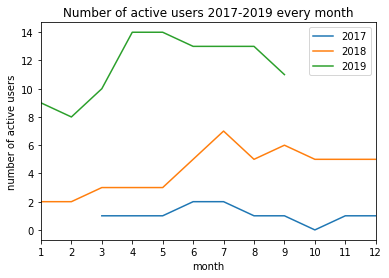

In [47]:
table.plot(kind= 'line')
plt.xticks(np.arange(1,13,1))
plt.ylabel('number of active users')
plt.legend(['2017','2018','2019'])
plt.title('Number of active users 2017-2019 every month')
plt.show()

The number of active users are growing from 2017 - 2019, espically month 3-9. (People are more likely to work out in spring and summer.)

## Plot 2

In [48]:
g = dataframe[['day','fake_user_id']]
table = pd.pivot_table(g, index= ['day'],aggfunc=lambda x: len(x.unique()))
table

,fake_user_id
day,
1,20
2,19
3,19
4,13
5,19
6,17
7,20
8,19
9,17


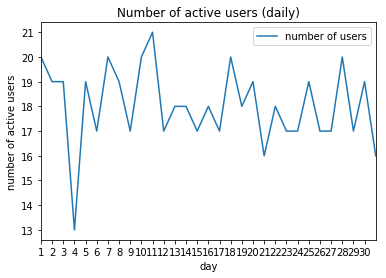

In [49]:
table.plot()
plt.xticks(np.arange(1,31,1))
plt.ylabel('number of active users')
plt.legend(['number of users'])
plt.title('Number of active users (daily)')
plt.show()

The 4th day has the lowest number of users (13), and 11th has highest number of users(21). The daily active users are pretty much the same, except the 4th.

## Plot 3

In [50]:
# take the dataframe contains weekday and id
names = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday','Sunday']
g2 = dataframe[['weekday','fake_user_id']]
df_pivot = pd.pivot_table(g2, index= 'weekday',aggfunc=lambda x: len(x.unique()))
df_pivot.reindex(names)

,fake_user_id
weekday,
Monday,20
Tuesday,22
Wednesday,21
Thursday,22
Friday,22
Saturday,22
Sunday,18


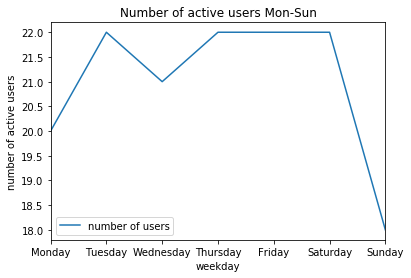

In [51]:
df_pivot.reindex(names).plot(kind = 'line')
plt.ylabel('number of active users')
plt.legend(['number of users'])
plt.title('Number of active users Mon-Sun')
plt.show()

Sunday has the least number of active users, which means people are less likely to use the app/workout on Sunday. People are more likely to use app on Tuesday, Thursday, Friday and Saturday.

## Plot 4

In [52]:
df_pivot = pd.pivot_table(g2, index= 'weekday',aggfunc='count')
df_pivot.reindex(names)

,fake_user_id
weekday,
Monday,5611
Tuesday,7066
Wednesday,6383
Thursday,5585
Friday,4791
Saturday,4012
Sunday,3024


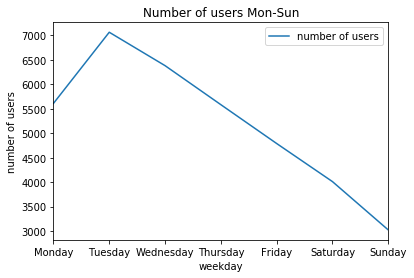

In [53]:
df_pivot.reindex(names).plot(kind = 'line')
plt.ylabel('number of users')
plt.legend(['number of users'])
plt.title('Number of users Mon-Sun')
plt.show()

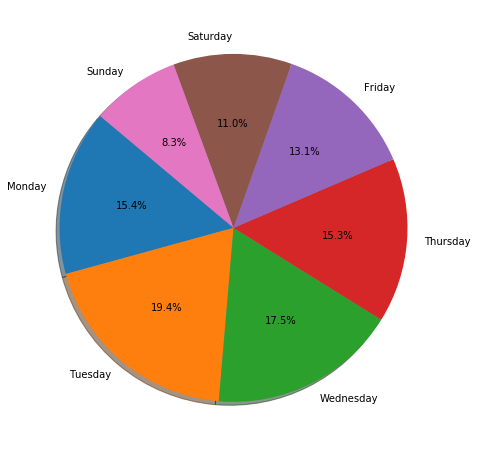

In [54]:
plt.figure(figsize=(8,8))
names = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday','Sunday']
plt.pie(df_pivot.reindex(names), labels=names, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

Sunday still has the least number of user, which means people are less likely to use the app/workout on Sunday. People are more likely to use app on Tuesday. Number of users on Tue are 2X than Sun. Tue - Sun decrease.

## Plot 5

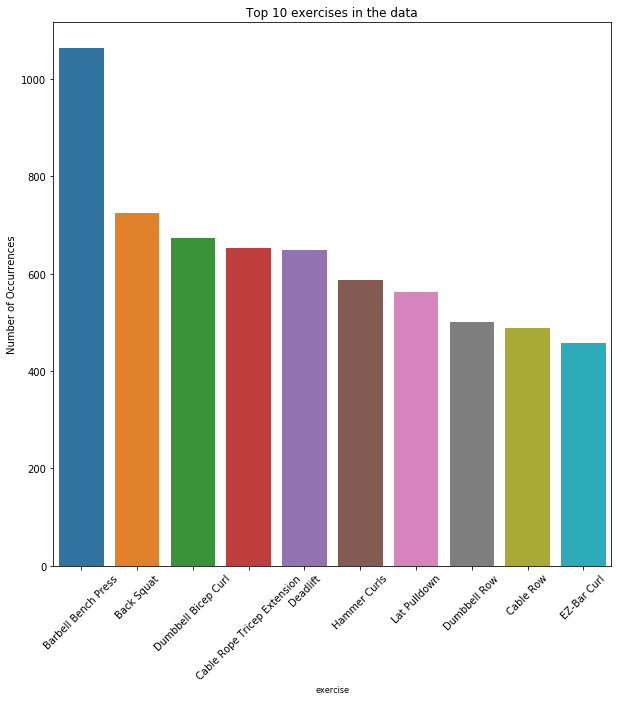

In [55]:
# Plotting a bar graph of the count in exercise name, for the first ten exercise
# listed in the column 
exerciseName  = dataframe['exerciseName'].value_counts()
exerciseName  = exerciseName [:10,]
plt.figure(figsize=(10,10))
sns.barplot(exerciseName.index, exerciseName.values, alpha=1.0)
plt.title('Top 10 exercises in the data')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('exercise', fontsize=8)
plt.xticks(rotation=45)
plt.show()

People are perfer doing Barbell Bench Press.

In [56]:
dataframe['exerciseName'].value_counts()

Barbell Bench Press                            1063
Back Squat                                      725
Dumbbell Bicep Curl                             674
Cable Rope Tricep Extension                     653
Deadlift                                        648
Hammer Curls                                    586
Lat Pulldown                                    562
Dumbbell Row                                    500
Cable Row                                       488
EZ-Bar Curl                                     458
Dumbbell Bench Press                            401
Barbell Curl                                    400
Close-Grip Bench Press                          397
Dumbbell Shoulder Press                         384
Dumbbell Front Raise                            382
Pull Up                                         367
Dumbbell Fly                                    362
Leg Extension                                   344
Superman                                        340
Barbell Incl

In [57]:
dataframe.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id,year,month,day,weekday
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651,2019,8,29,Thursday
1,z3On32OJkp,230.0,5.0,0.000,0.0,0.000,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652,2017,8,8,Tuesday
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653,2018,7,23,Monday
3,fUFDxaLxl5,185.0,10.0,0.000,0.0,0.000,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652,2017,7,2,Sunday
4,cLXsHcJvH6,50.0,8.0,0.000,0.0,0.000,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652,2017,7,17,Monday


## Plot 6

In [58]:
# Create a column to calcualte the total weight for each singleSetId
dataframe['total_weight'] = dataframe.weight * dataframe.reps

In [59]:
dataframe.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id,year,month,day,weekday,total_weight
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651,2019,8,29,Thursday,0.0
1,z3On32OJkp,230.0,5.0,0.000,0.0,0.000,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652,2017,8,8,Tuesday,1150.0
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653,2018,7,23,Monday,60.0
3,fUFDxaLxl5,185.0,10.0,0.000,0.0,0.000,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652,2017,7,2,Sunday,1850.0
4,cLXsHcJvH6,50.0,8.0,0.000,0.0,0.000,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652,2017,7,17,Monday,400.0


In [60]:
# Create a dummy variable: weight exercise -> 1; non-weight -> 0
dataframe['IsWeight'] = (dataframe["total_weight"] > 0).astype(int)

In [61]:
dataframe.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id,year,month,day,weekday,total_weight,IsWeight
0,jR3l0HcE3i,0.0,0.0,905.256,922.0,6.096,1,csFaf3pVCX,Hiking,3ATrXJwjxh,2019-08-29,fake_id_651,2019,8,29,Thursday,0.0,0
1,z3On32OJkp,230.0,5.0,0.000,0.0,0.000,2,V24b7hwFLS,Tricep Dip,8710iVSrkV,2017-08-08,fake_id_652,2017,8,8,Tuesday,1150.0,1
2,OpZ0bQBhDk,5.0,12.0,0.000,0.0,0.000,2,ecGi1Rm40N,Freemotion Shoulder Press,fLWS8urOeY,2018-07-23,fake_id_653,2018,7,23,Monday,60.0,1
3,fUFDxaLxl5,185.0,10.0,0.000,0.0,0.000,2,fssoNBJGr8,Smith Machine Behind the Back Shrug,HpjbkJevZp,2017-07-02,fake_id_652,2017,7,2,Sunday,1850.0,1
4,cLXsHcJvH6,50.0,8.0,0.000,0.0,0.000,3,SZDO2A4M0Z,EZ-Bar Skullcrusher,sY1qILXlXr,2017-07-17,fake_id_652,2017,7,17,Monday,400.0,1


In [62]:
# Group data to read more clearly
df = dataframe.groupby(['fake_user_id','workoutId','workoutDate','exerciseSetParseId']).agg({'total_weight': 'mean'})

In [63]:
df.head()

total_weight
fake_user_id workoutId  workoutDate exerciseSetParseId              
fake_id_651  02tMlDFXKg 2018-08-29  7DgyMuvVnF            459.262821
                                    BsHfdchEvY            158.757518
                                    NaGlz1thSZ            421.841406
                                    ULxN3IV88z            472.303617
                                    gEDrBik19O              0.000000

In [64]:
# Count the number of exerciseSetParse of weight exercise and non-weight exercise
weight_count = ((df != 0).values.sum())
nonweight_count = ((df == 0).values.sum())

In [65]:
np.count_nonzero(df['total_weight'])

7937

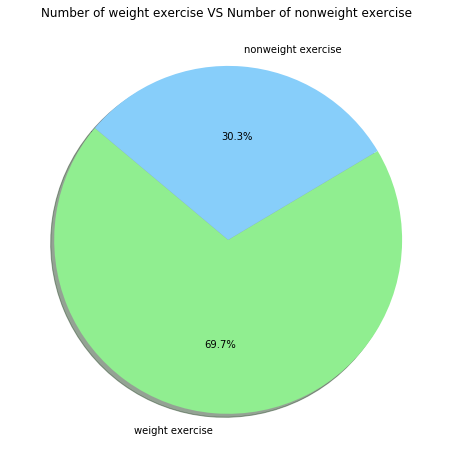

In [66]:
# Pie chart: # of weight vs # of non-weight
plt.figure(figsize=(8,8))
size = [weight_count, nonweight_count]
activities = ['weight exercise', 'nonweight exercise']
colors = ['lightgreen', 'lightskyblue']
explode = (0.1, 0)
plt.title('Number of weight exercise VS Number of nonweight exercise ')
plt.pie(size, labels=activities, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

People are more likely to use app to do weight exercise than non weight exercise. (they are more likely yo use app in the gym)

## Plot 7

In [67]:
corr_df = dataframe[['weight','reps','distance','duration','elevationGain','setNumber']]

In [68]:
# correlation matrix
corr = corr_df.corr()
corr

,weight,reps,distance,duration,elevationGain,setNumber
weight,1.000000,-0.136418,-0.023750,-0.058148,-0.019711,0.177235
reps,-0.136418,1.000000,-0.065261,-0.159285,-0.054910,-0.153241
distance,-0.023750,-0.065261,1.000000,0.331994,0.067984,-0.037664
duration,-0.058148,-0.159285,0.331994,1.000000,0.221073,-0.088683
elevationGain,-0.019711,-0.054910,0.067984,0.221073,1.000000,-0.031668
setNumber,0.177235,-0.153241,-0.037664,-0.088683,-0.031668,1.000000


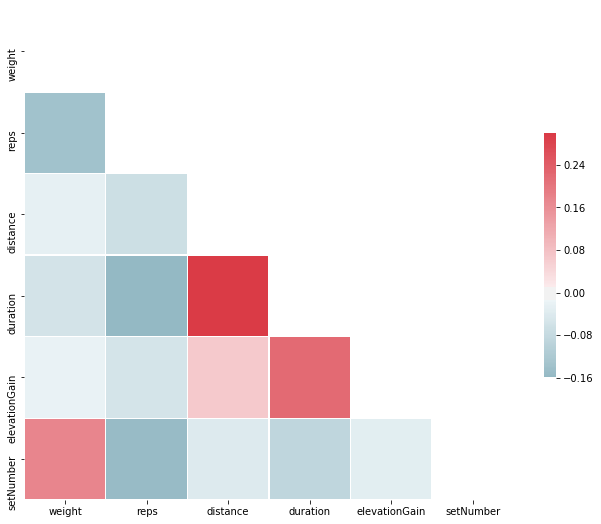

In [69]:
# Correlation heatmap
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The duration and distance has a weak positive correlation=0.332. The duration and elevation has a weak positive corr=0.221. (People has long duration tends to run long distance and gets high elevation)

# 4. ML Model

In [70]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error

In [71]:
df = dataframe[['year','month','fake_user_id']]
df.head()

,year,month,fake_user_id
0,2019,8,fake_id_651
1,2017,8,fake_id_652
2,2018,7,fake_id_653
3,2017,7,fake_id_652
4,2017,7,fake_id_652


In [72]:
series = df.groupby(['year','month']).agg({'fake_user_id': 'nunique'})
series['user_count']=series['fake_user_id']
series.drop(columns = 'fake_user_id', inplace=True)
series.head()

user_count
year month            
2017 3               1
     4               1
     5               1
     6               2
     7               2

In [73]:
X = series.values
X.size

30

## 4.1 Train Test Split

In [74]:
# Split the dataset into train and test
train = X[0:24] # 24 data(80%) as train data
test = X[24:31]  # 6 data(20%) as test data
predictions = []
test

array([[14],
       [14],
       [13],
       [13],
       [13],
       [11]])

In [75]:
# ARIMA MODEL
model = ARIMA(train, order = (0,1,1))
fit_model = model.fit()

In [76]:
# Predict the test data and future data
preds = fit_model.forecast(steps=9)[0]
preds

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


array([ 9.83080165, 10.20556447, 10.58032729, 10.95509011, 11.32985294,
       11.70461576, 12.07937858, 12.4541414 , 12.82890423])

In [77]:
# convert the predictions' numbers to integer
preds = preds.astype(int)

In [78]:
preds

array([ 9, 10, 10, 10, 11, 11, 12, 12, 12])

## 4.2 Evaluation

In [79]:
# Create a dataframe to store predictions
preds = pd.DataFrame({'date':['2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01'],
                     'user_count':preds[:]})

In [80]:
# Create the ['year'] and ['month'] column
preds['date'] = pd.to_datetime(preds['date'])
preds['year'] = preds['date'].dt.year
preds['month'] = preds['date'].dt.month

In [81]:
# Create a pivot table for further concat
preds = preds[['year','month','user_count']]
preds = pd.pivot_table(preds, index = ['year','month'])

In [82]:
# Split the predictions to preict the test and future.
pred_test = preds[:6]
pred_test

user_count
year month            
2019 4               9
     5              10
     6              10
     7              10
     8              11
     9              11

In [83]:
pred_future = preds[6:]
pred_future

user_count
year month            
2019 10             12
     11             12
     12             12

In [84]:
# Concat the original, pred test and pred future dataset
res = pd.concat([series,pred_test,pred_future], axis=1, sort=False)
res

user_count  user_count  user_count
year month                                    
2017 3             1.0         NaN         NaN
     4             1.0         NaN         NaN
     5             1.0         NaN         NaN
     6             2.0         NaN         NaN
     7             2.0         NaN         NaN
     8             1.0         NaN         NaN
     9             1.0         NaN         NaN
     11            1.0         NaN         NaN
     12            1.0         NaN         NaN
2018 1             2.0         NaN         NaN
     2             2.0         NaN         NaN
     3             3.0         NaN         NaN
     4             3.0         NaN         NaN
     5             3.0         NaN         NaN
     6             5.0         NaN         NaN
     7             7.0         NaN         NaN
     8             5.0         NaN         NaN
     9             6.0         NaN         NaN
     10            5.0         NaN         NaN
     11            5.0         NaN         NaN
     12            5.0         NaN         NaN
2019 1             9.0         NaN         NaN
     2             8.0         NaN         NaN
     3            10.0         NaN         NaN
     4            14.0         9.0         NaN
     5            14.0        10.0         NaN
     6            13.0        10.0         NaN
     7            13.0        10.0         NaN
     8            13.0        11.0         NaN
     9            11.0        11.0         NaN
     10            NaN         NaN        12.0
     11            NaN         NaN        12.0
     12            NaN         NaN        12.0

Text(0.5, 1.0, 'Predicit number of active users')

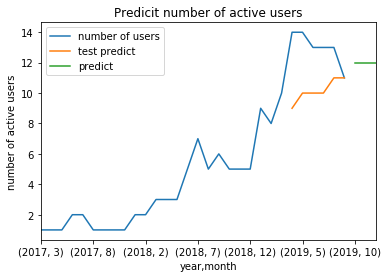

In [85]:
# Draw a line graph to see the trend
res.plot()
plt.ylabel('number of active users')
plt.legend(['number of users','test predict','predict'])
plt.title('Predicit number of active users')

In [86]:
# MSE
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test, pred_test)
error

2.8333333333333335

Averagely, our model predictions are off by approximately 2.83

# 5. Summary

In [87]:
# take the dataframe contains year, month and id
g = dataframe[['year','month','fake_user_id']]

In [88]:
table= pd.pivot_table(g, index = ['year','month'],aggfunc=lambda x: len(x.unique()))
table['user_count'] = table['fake_user_id']
table.drop(columns = 'fake_user_id', inplace=True)
table

user_count
year month            
2017 3               1
     4               1
     5               1
     6               2
     7               2
     8               1
     9               1
     11              1
     12              1
2018 1               2
     2               2
     3               3
     4               3
     5               3
     6               5
     7               7
     8               5
     9               6
     10              5
     11              5
     12              5
2019 1               9
     2               8
     3              10
     4              14
     5              14
     6              13
     7              13
     8              13
     9              11

In [89]:
new = table.append(pred_future, sort=False)
new

user_count
year month            
2017 3               1
     4               1
     5               1
     6               2
     7               2
     8               1
     9               1
     11              1
     12              1
2018 1               2
     2               2
     3               3
     4               3
     5               3
     6               5
     7               7
     8               5
     9               6
     10              5
     11              5
     12              5
2019 1               9
     2               8
     3              10
     4              14
     5              14
     6              13
     7              13
     8              13
     9              11
     10             12
     11             12
     12             12

In [90]:
new = pd.pivot_table(new,index= ['month'], columns=['year'],values=['user_count'])

In [91]:
new

user_count           
year        2017 2018  2019
month                      
1            NaN  2.0   9.0
2            NaN  2.0   8.0
3            1.0  3.0  10.0
4            1.0  3.0  14.0
5            1.0  3.0  14.0
6            2.0  5.0  13.0
7            2.0  7.0  13.0
8            1.0  5.0  13.0
9            1.0  6.0  11.0
10           NaN  5.0  12.0
11           1.0  5.0  12.0
12           1.0  5.0  12.0

In [92]:
new.iloc[(9,0)] = 0.0

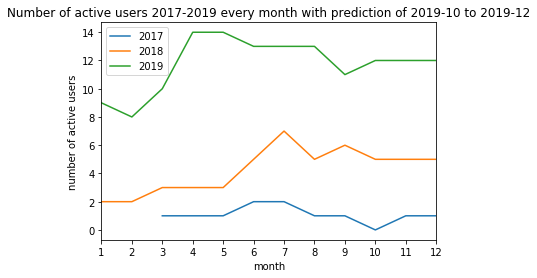

In [93]:
new.plot(kind= 'line')
plt.xticks(np.arange(1,13,1))
plt.ylabel('number of active users')
plt.legend(['2017','2018','2019'])
plt.title('Number of active users 2017-2019 every month with prediction of 2019-10 to 2019-12')
plt.show()

As compare to the plot1 we draw before, the trends are similar to 2017-10 - 2017-12 and 2018-10 - 2018-12. However, our dataset only have 30 observations which is small. Our predictions may be not that accurate. As the increase of the dataset size, our ARIMA model will performs better.

# 6. Miscellaneous
## find d

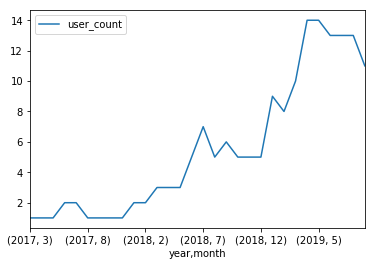

In [94]:
series.plot()

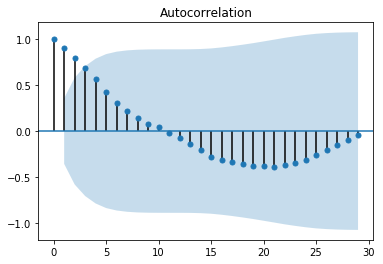

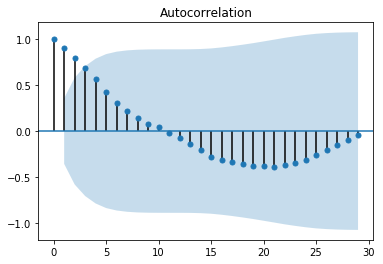

In [95]:
plot_acf(series)

The data is not stationary -> mean , variance are not constant over period

In [96]:
series_diff = series.diff(periods = 1).dropna()

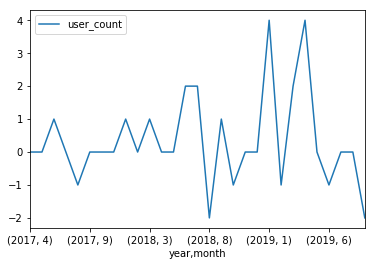

In [97]:
series_diff.plot()

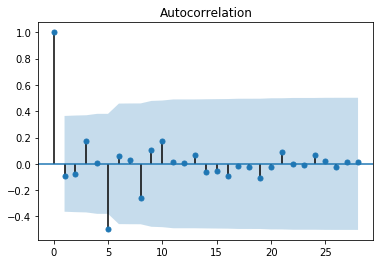

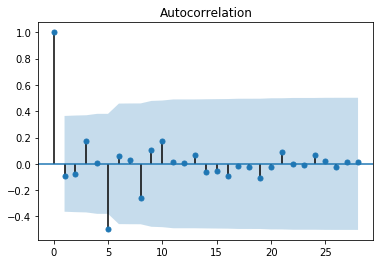

In [98]:
plot_acf(series_diff)

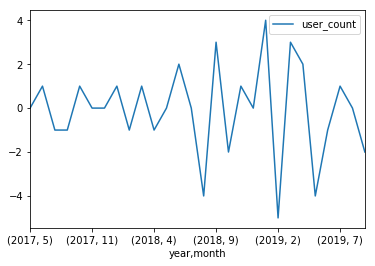

In [99]:
series_diff2 = series_diff.diff(periods = 1).dropna()
series_diff2.plot()

## find p

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


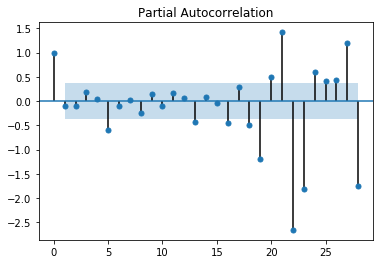

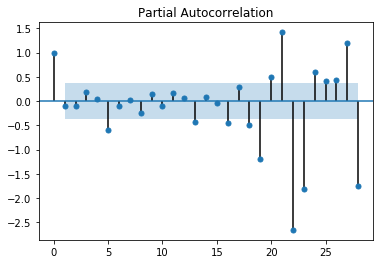

In [100]:
plot_pacf(series_diff)

## find p,d,q

In [101]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [102]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue 

(0, 0, 0) 119.78490607354354
(0, 0, 1) 108.99178558154046
(0, 0, 2) 100.99071677494702
(0, 0, 3) 97.50326451825377
(0, 1, 0) 79.23996875884852
(0, 1, 1) 78.5972946445131
(0, 1, 2) 80.56911321489899
(0, 1, 3) 81.25061815725905
(0, 1, 4) 79.44783804432
(0, 2, 0) 97.86618890193522
(0, 2, 1) 80.91891816726807
(1, 0, 0) 88.34663845514314
(1, 1, 0) 78.38243789813792
(1, 1, 1) 79.13475496329318
(1, 2, 0) 87.13989191467623
(1, 2, 1) 79.99218516227172
(2, 0, 0) 89.27221248730527
(2, 0, 4) 89.6402725951041
(2, 1, 0) 80.35923694624593
(2, 1, 1) 347.29673281467444
(2, 1, 2) 82.29944942552848
(2, 2, 0) 86.46512401232809
(3, 0, 0) 100.32852946201189
(3, 0, 2) nan
(3, 1, 0) 81.82958353399582
(3, 1, 1) 82.1112663480816
(3, 1, 2) 85.06970343035601
(3, 2, 0) 85.53061180392616
(4, 0, 0) 102.61962461378678
(4, 0, 2) nan
(4, 0, 3) nan
(4, 0, 4) nan
(4, 1, 0) 83.82935284258375
(4, 1, 1) 84.104124605529
(4, 1, 2) 86.08838083164447
(4, 1, 3) nan
(4, 2, 0) 87.09432961419834
